## 신경망을 위한 데이터 표현

#### 텐서(tensor)

- 다차원 넘파이 배열
- 최근 모든 머신러닝 또는 딥러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용

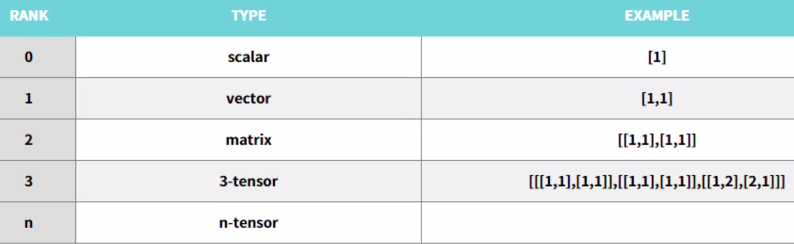

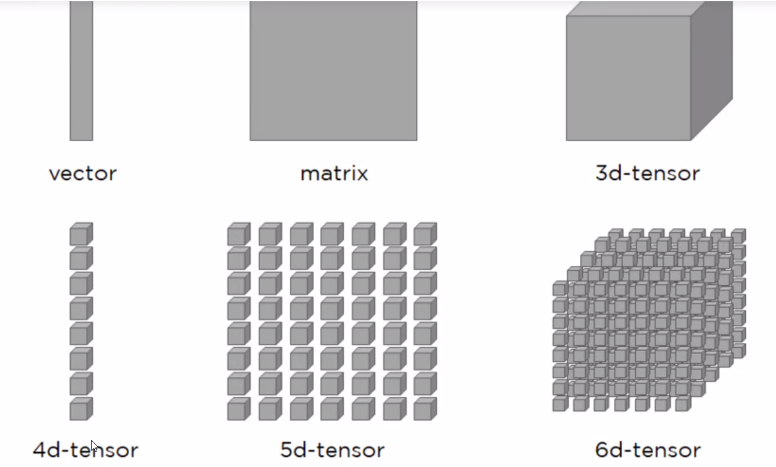

스칼라(0D 텐서, 0차원 텐서)
- 하나의 숫자만 담고 있는 텐서
- 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서에 해당
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있음
- 스칼라 텐서의 축 개수는 0임(ndim = = 0)

벡터(1D 텐서)
- 숫자의 배열
- 하나의 축

5D 벡터 vs 5D 텐서
- array([1, 2, 3, 4, 5]) : 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
    - 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것임    
- 5D 텐서는 5개의 축을 가진 것임
    - 텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있음

행렬(2D 텐서)
- 벡터의 배열이 행렬(matrix) 또는 2D 텐서임
- 행렬에는 2개의 축이 있음
- 보통 행(row)과 열(column)이라고 부름
- 첫 번째 축에 놓여 있는 원소를 행이라 부르고
- 두 번째 축에 놓여 있는 원소를 열이라 부름

3D 텐서와 고차원 텐서
- 2D 행렬들을 하나의 새로운 배열로 합치면 
- 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D 텐서가 만들어짐
- 3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐

- 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룸
- 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 함


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 스칼라(0D 텐서, 0차원 텐서)
import numpy as np
s=np.array(12)
s
s.ndim # 축 개수 0

array(12)

0

In [3]:
v = np.array([1,2,3,4,5])
v
v.ndim # 축의 개수 1 : 1D텐서(벡터)

array([1, 2, 3, 4, 5])

1

In [4]:
# 행렬(2D 텐서)
m = np.array([[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]])
m
m.ndim


array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

2

In [5]:
x = np.array([
            [[ 5, 78,  2, 34,  0],
            [ 6, 79,  3, 35,  1],
            [ 7, 80,  4, 36,  2]],
            [[ 5, 78,  2, 34,  0],
            [ 6, 79,  3, 35,  1],
            [ 7, 80,  4, 36,  2]],
            [[ 5, 78,  2, 34,  0],
            [ 6, 79,  3, 35,  1],
            [ 7, 80,  4, 36,  2]]
                               ])
x
x.ndim

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

3

**텐서의 3가지 핵심 속성**  


(1)축의 개수 
- 예를 들어 3D 텐서에는 3개의 축이 있고, 
- 행렬에는 2개의 축이 있음
- 넘파이 라이브러리에서는 ndim 속성에 저장되어 있음  
         
(2)크기(shape)
- 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple) 임
- 예를 들어 앞에 나온 행렬의 크기는 (3, 5)이고 3D 텐서의 크기는 (3, 3, 5)임
- 벡터의 크기는 (5,)처럼 1개의 원소로 이루어진 튜플임
- 배열 스칼라는 ()처럼 크기가 없음
         
(3)데이터 타입(넘파이에서는 dtype에 저장됨)
- 텐서에 포함된 데이터의 타입임
- 예를 들어 텐서의 타입은 float32, uint8, float64 등이 될 수 있음
- 드물게 char 타입을 사용함
- 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 
    - 넘파이 배열은 (그리고 대부분 다른 라이브러리는) 가변 길이의 문자열을 지원하지 않음


In [20]:
s.shape # 0D 텐서에 해당 (스칼라) 0차원

()

In [21]:
v.shape

(5,)

In [23]:
m.shape #2D 텐서

(3, 5)

In [25]:
x.shape # 2D 텐서

(3, 3, 5)

텐서의 예 : 앞으로 보게 될 텐서의 몇 가지 예
- 우리가 사용할 데이터는 대부분 다음 중 하나에 속할 것임
- 벡터 데이터: (samples, features) 크기의 2D 텐서
- **시계열 데이터 또는 시퀀스(sequence) 데이터**
    - (samples, timesteps, features) 크기의 3D 텐서
- 이미지: (samples, height, width, channels) 
        - 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상: (samples, frames, height, width, channels) 
        - 또는 (samples, frames, channels, height, width) 크기의 5D 텐서
